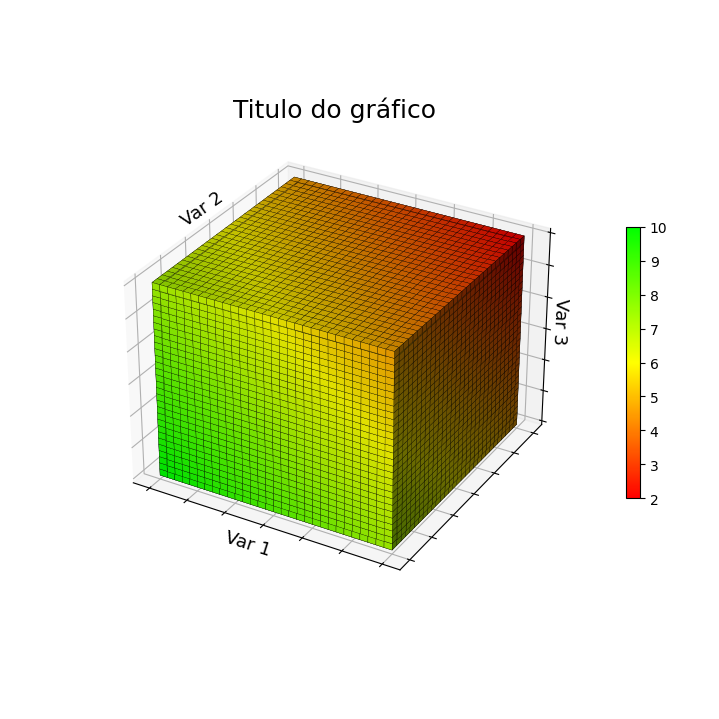

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

N_BINS = 256

def normalize_value(value, min_value, max_value):
    """Normaliza um valor com base em um mínimo e máximo."""
    return (value - min_value) / (max_value - min_value)

def map_value_to_color(value):
    """Mapeia um valor normalizado para uma cor."""
    if value <= 0.4:
        return (1, 0, 0)  # Vermelho
    elif value <= 0.7:
        return (1, 1, 0)  # Amarelo
    else:
        return (0, 1, 0)  # Verde

def add_color_to_list(value, colors_list):
    """Adiciona uma cor à lista de cores, baseada em um valor."""
    normalized_value = normalize_value(value, min_value, max_value)
    colors_list.append(map_value_to_color(normalized_value))

# Configuração da plotagem
axes = [30, 30, 30]
data = np.ones(axes, dtype=np.float32)
x, y, z = np.meshgrid(np.linspace(0, 5, axes[0]),
                      np.linspace(0, 5, axes[1]),
                      np.linspace(0, 5, axes[2]))
heatmap_data = x + y + z

# Mapeamento de cores
min_value, max_value = 0, 10
colors = []
answers_values = []

for i in range(3):
    pergunta = float(input(f"Digite a resposta para a pergunta {i + 1} (0 a 10): "))
    add_color_to_list(pergunta, colors)
    answers_values.append(pergunta)

cmap_name = "custom_graduated_heatmap"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=N_BINS)
heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
colors = custom_cmap(heatmap_normalized)

# Plotagem 3D
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
voxels = ax.voxels(data, facecolors=colors, alpha=1, edgecolor='k', linewidth=0.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Adicionar o título
ax.set_title(f'Titulo do gráfico', fontsize=18, fontweight='normal')

# Plotagem 2D (rótulos)
ax2d = fig.add_axes([0, 0, 1, 1], frameon=False)
ax2d.set_xticks([])
ax2d.set_yticks([])
ax2d.text(0.34, 0.215, "Var 1", ha="center", va="bottom", fontsize=13, rotation=-17.65)
ax2d.text(0.275, 0.685, "Var 2", ha="center", va="bottom", fontsize=13, rotation=35)
ax2d.text(0.785, 0.5205, "Var 3", ha="center", va="bottom", fontsize=13, rotation=266.9)

# Adicionar Colorbar
sm = cm.ScalarMappable(cmap=custom_cmap.reversed(), norm=plt.Normalize(vmin=min(answers_values), vmax=max(answers_values)))
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.1)

plt.show()